In [82]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
import torchvision
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from sklearn.cluster import KMeans
import pandas as pd
import os
import sys
import copy
import time

def display_image_in_actual_size(img):
    
    dpi = 80
    #im_data = plt.imread(im_path)
    height, width, *_ = img.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize,frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img, cmap='gray')

    plt.show()

warpdim 399


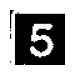

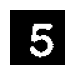

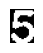

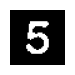

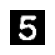

cpu
Train size:  (42000, 785)
Test size:  (28000, 784)


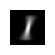

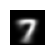

Loading mean and std from file...
Mean:  0.1342298208569142
Std:  0.3121060972440689
Train size:  (33615, 785)
Val size:  (8385, 785)
Test size:  (28000, 784)
sanity img data shape torch.Size([1, 28, 28])
sanity img lbls tensor([2, 8, 2, 7, 9, 1, 8, 0, 1, 9, 1, 3, 4, 7, 7, 1])
Training data sanity check
tensor(-0.4301)
tensor(2.7740)
tensor(-0.0526)
tensor(0.8791)
2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


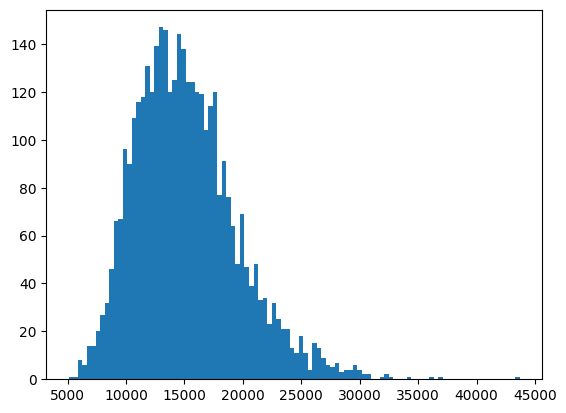

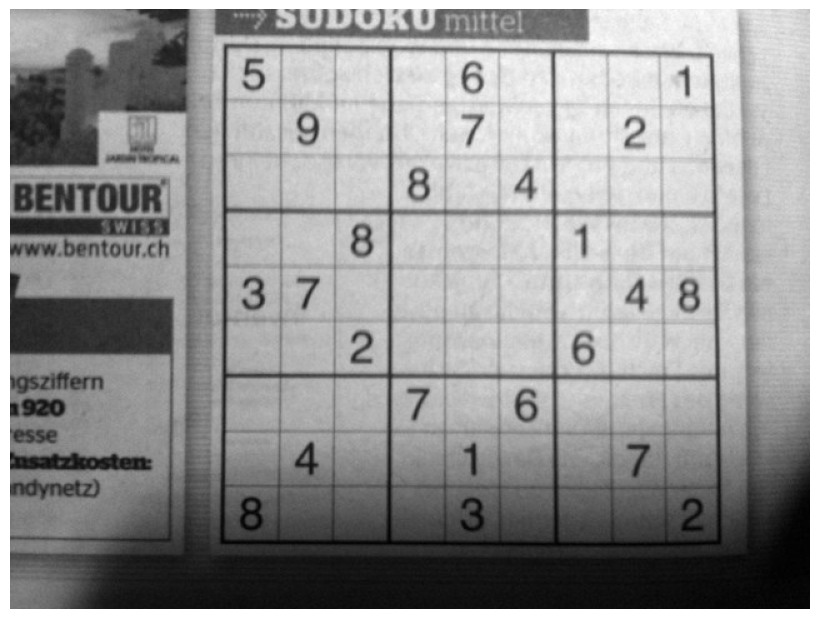

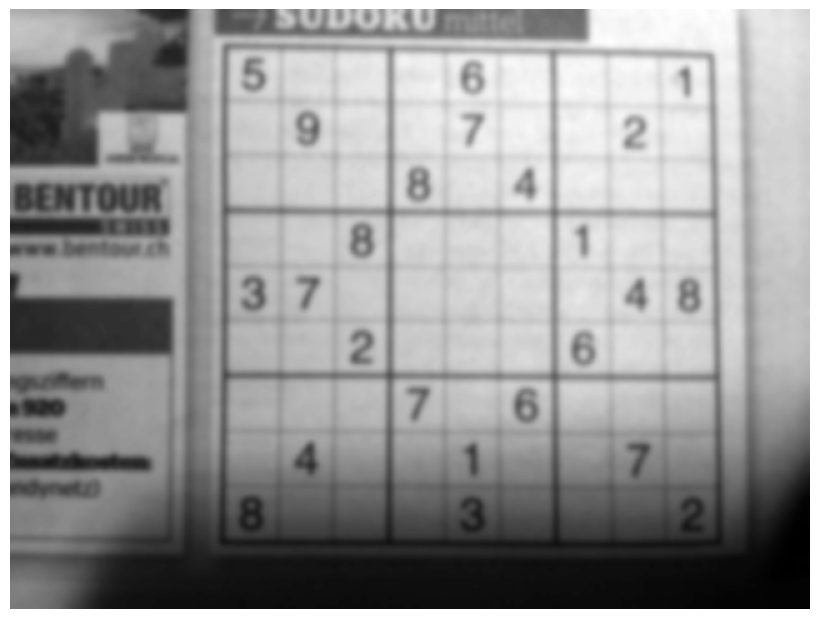

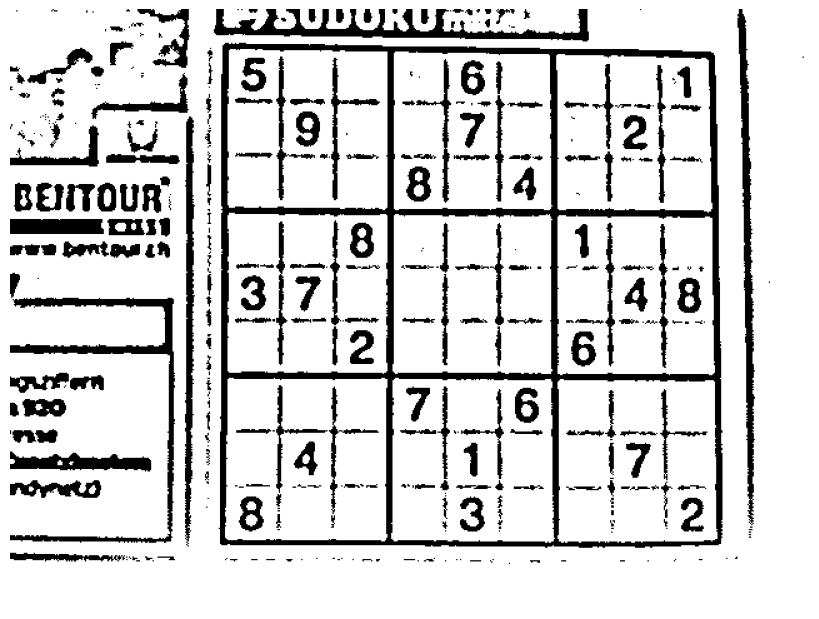

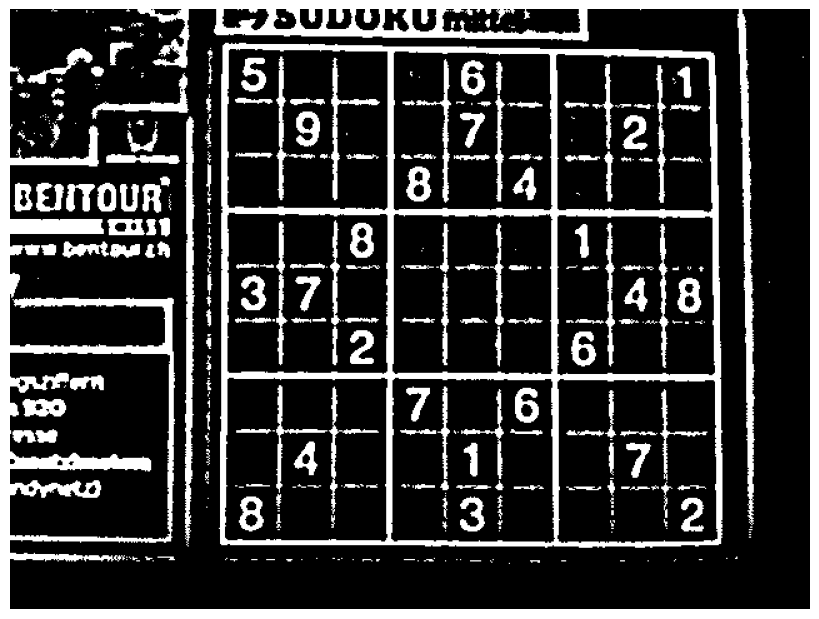

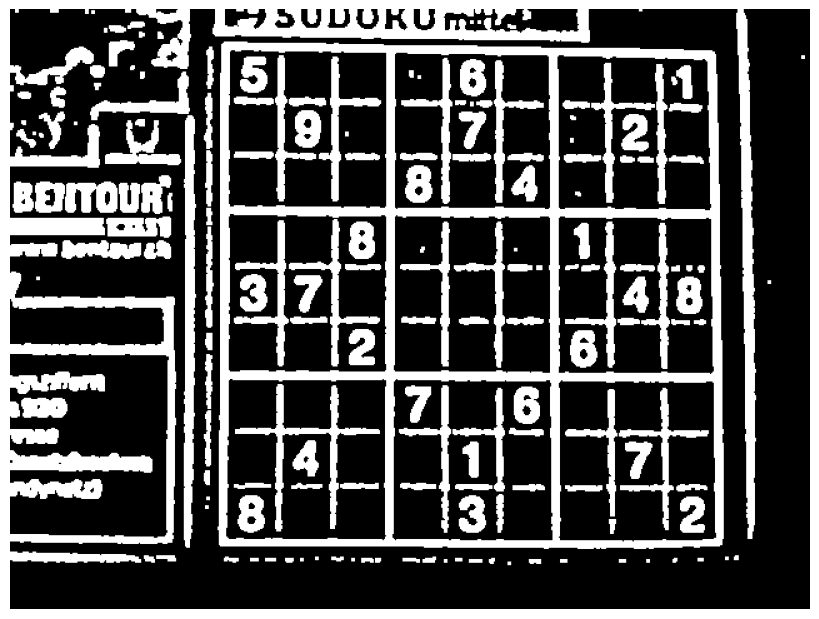

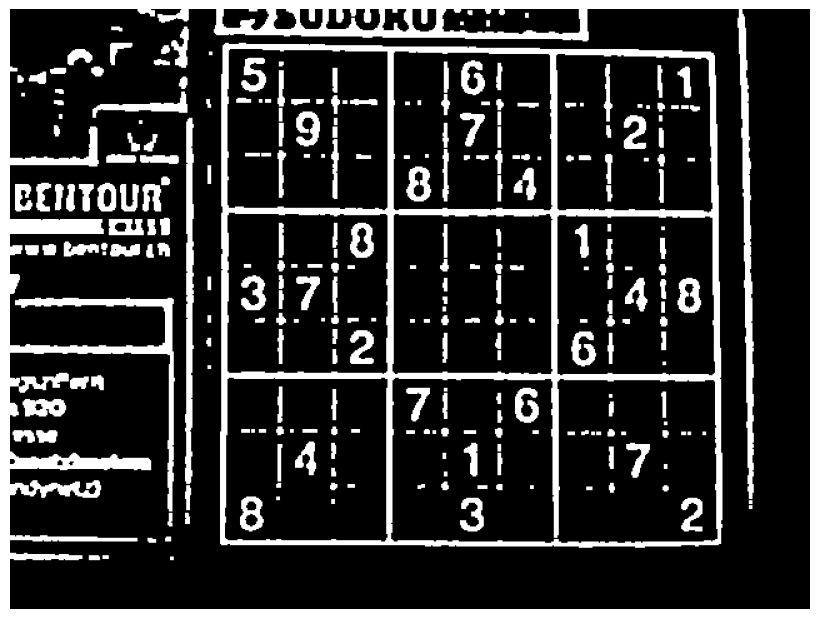

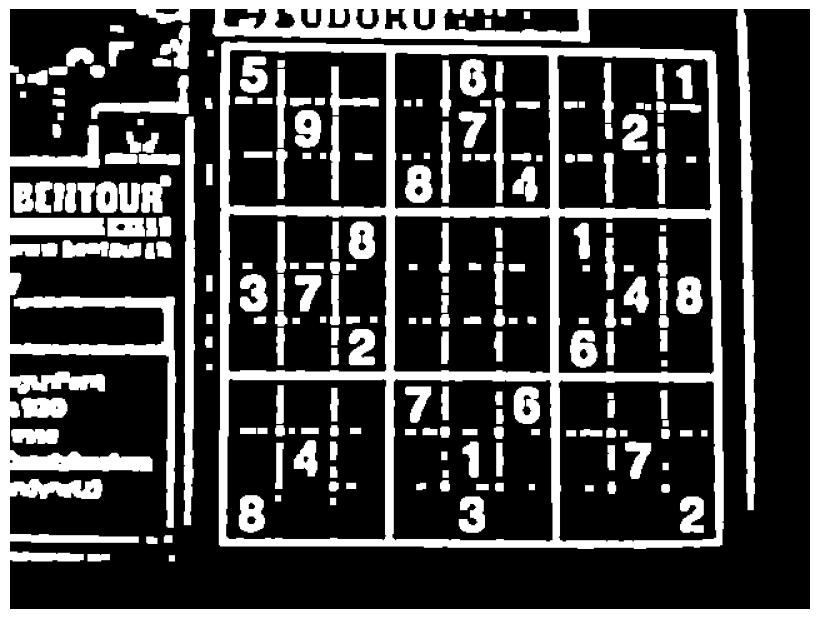

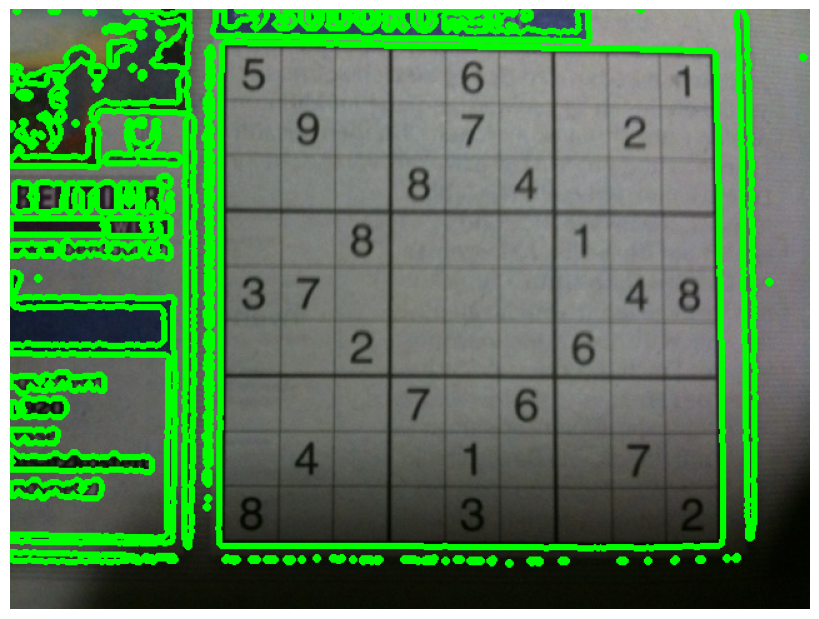

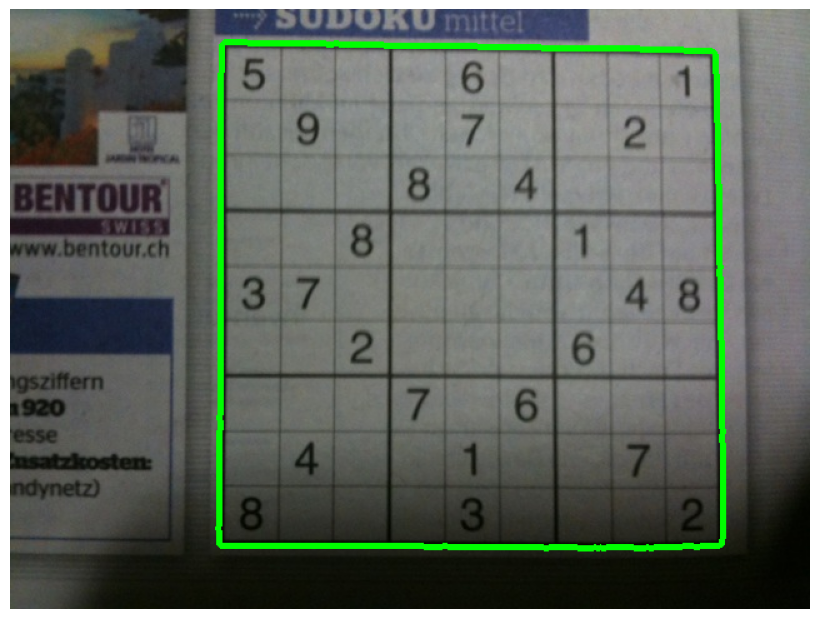

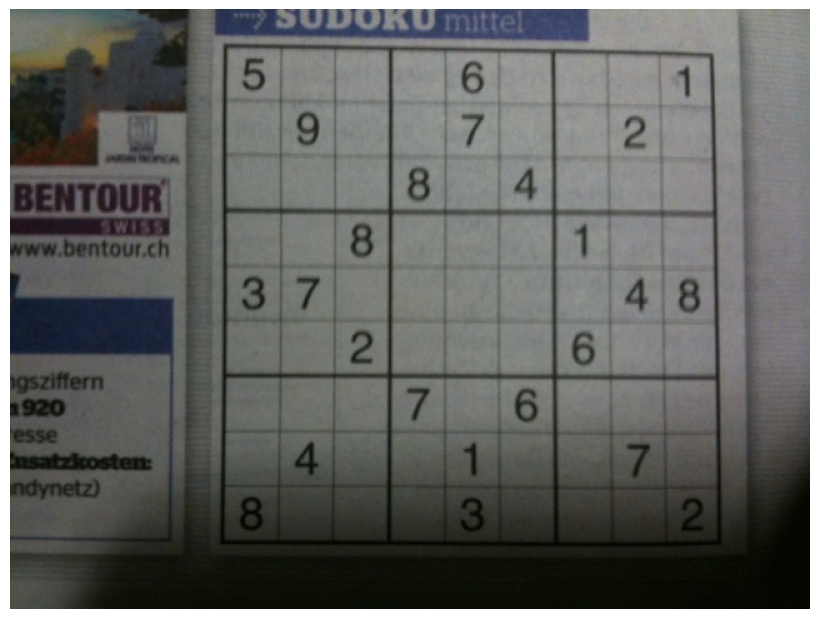

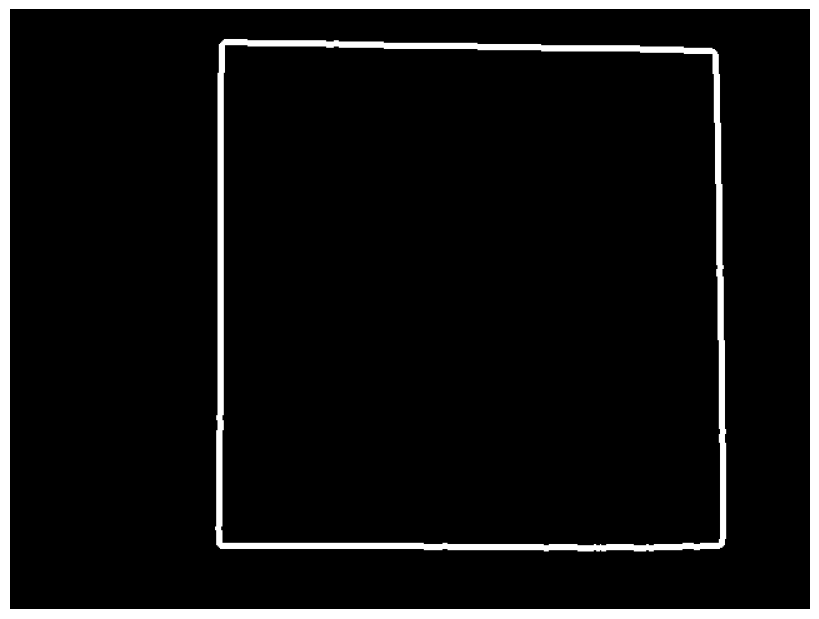

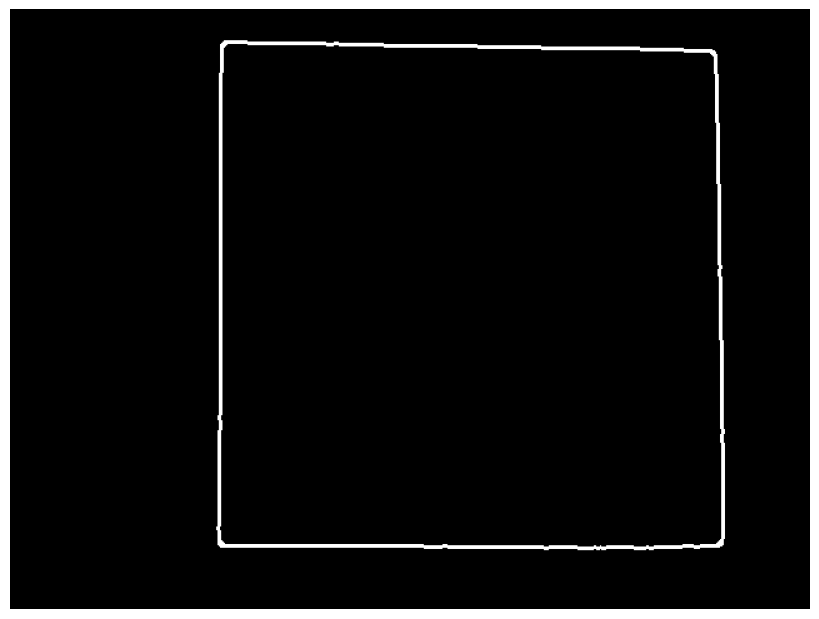

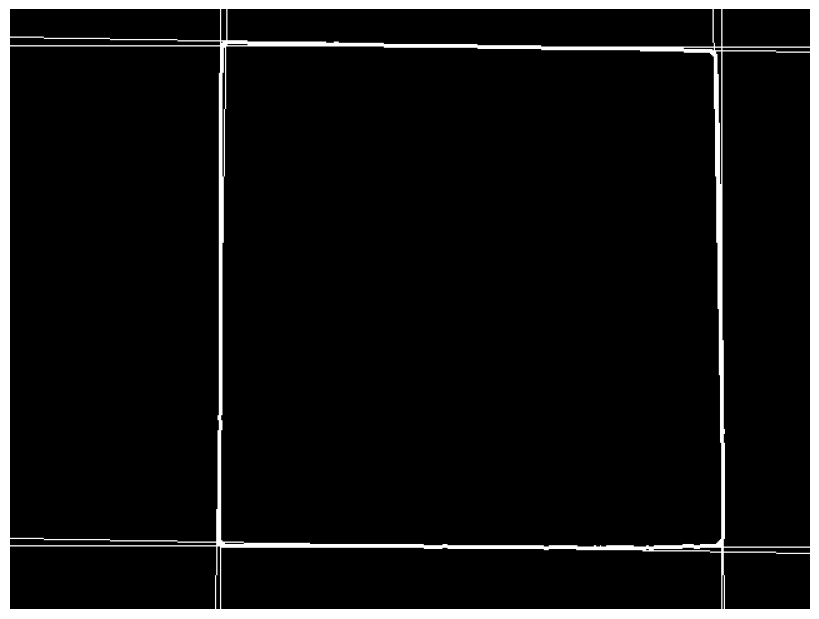

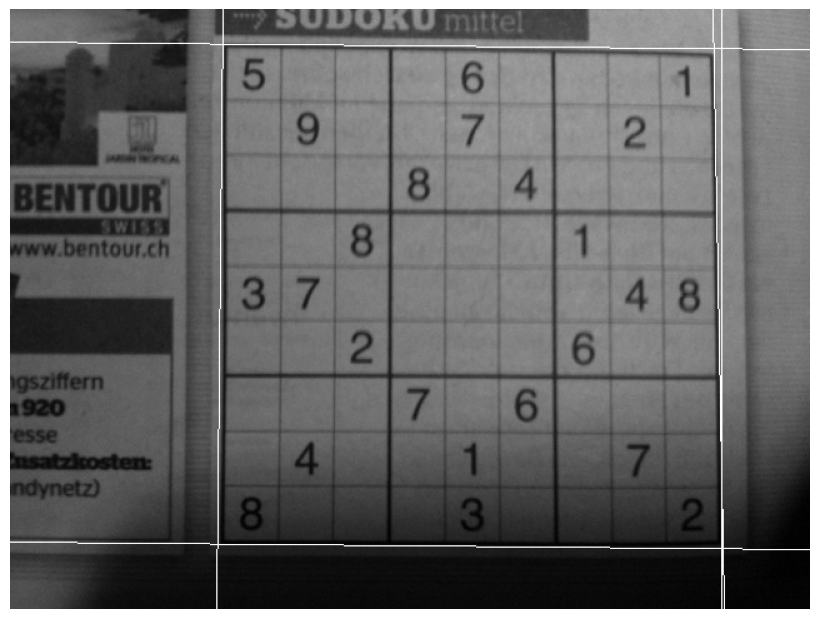

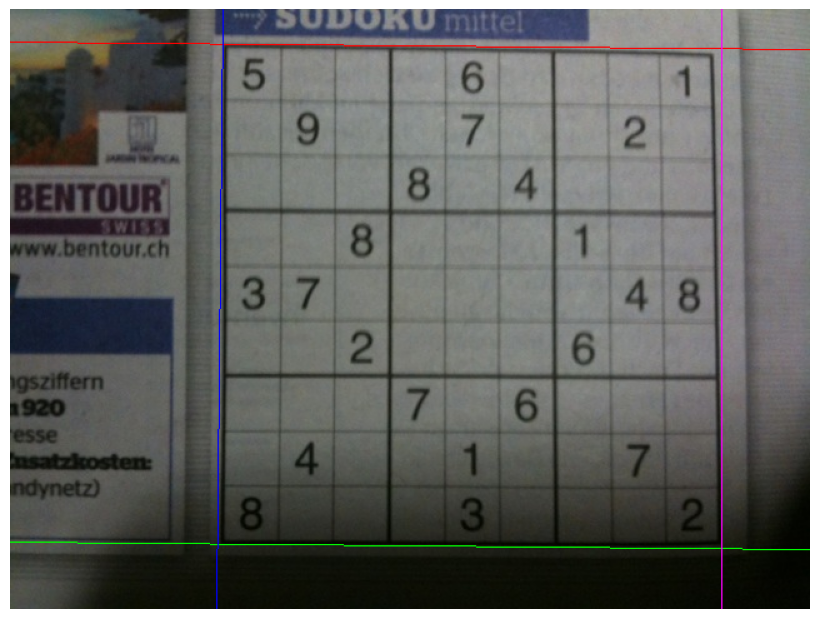

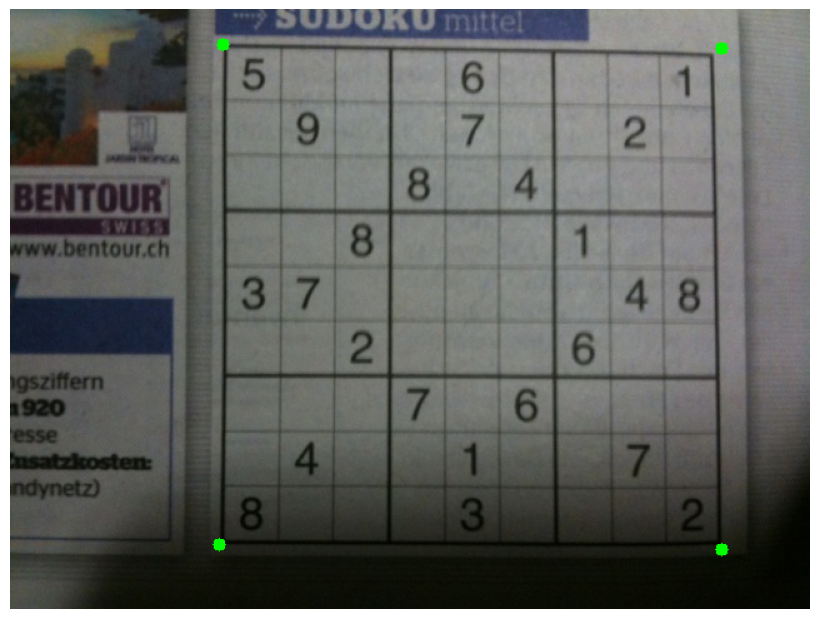

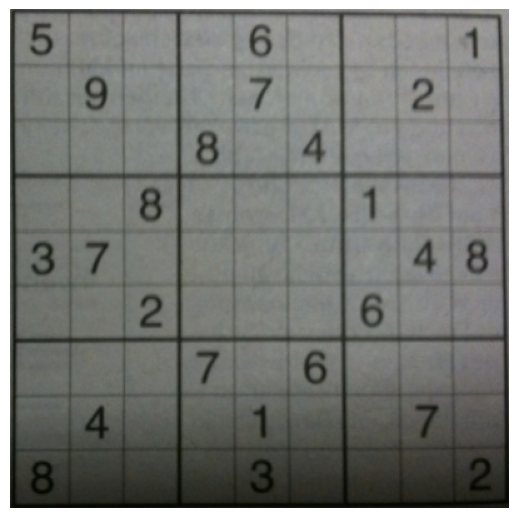

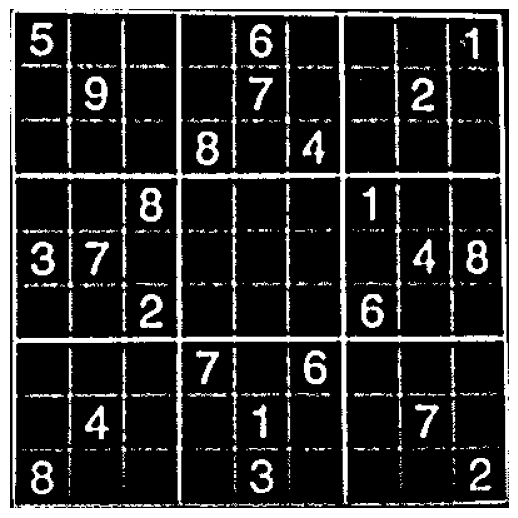

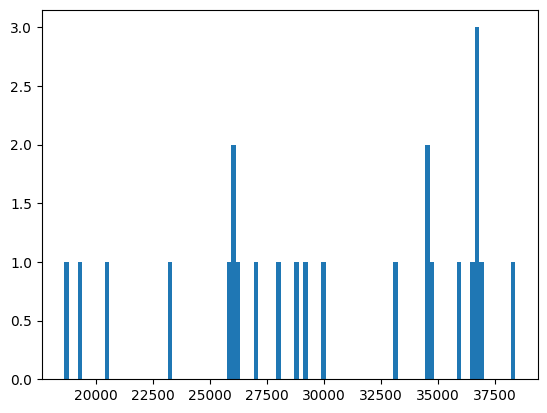

PredictionK torch.LongTensor tensor([[5, 9],
        [1, 9],
        [1, 9],
        [1, 9],
        [6, 5],
        [1, 9],
        [1, 9],
        [1, 9],
        [1, 7],
        [1, 9],
        [9, 5],
        [1, 9],
        [1, 9],
        [7, 9],
        [1, 9],
        [1, 9],
        [2, 3],
        [1, 9],
        [1, 9],
        [1, 9],
        [1, 9],
        [8, 0],
        [1, 9],
        [9, 4],
        [1, 9],
        [1, 9],
        [1, 9],
        [1, 9],
        [1, 9],
        [8, 0],
        [1, 9],
        [1, 9],
        [1, 9],
        [1, 7],
        [1, 9],
        [1, 9],
        [3, 5],
        [7, 9],
        [1, 9],
        [1, 9],
        [1, 9],
        [1, 9],
        [1, 9],
        [4, 9],
        [8, 0],
        [1, 9],
        [1, 9],
        [2, 7],
        [1, 9],
        [1, 9],
        [1, 9],
        [6, 5],
        [1, 9],
        [1, 9],
        [1, 9],
        [1, 9],
        [1, 9],
        [7, 9],
        [1, 9],
        [6, 5],
        [1,

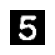

cell:  tensor(5)


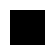

cell:  tensor(0)


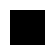

cell:  tensor(0)


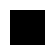

cell:  tensor(0)


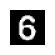

cell:  tensor(6)


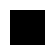

cell:  tensor(0)


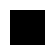

cell:  tensor(0)


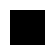

cell:  tensor(0)


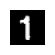

cell:  tensor(1)


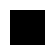

cell:  tensor(0)


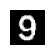

cell:  tensor(9)


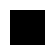

cell:  tensor(0)


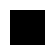

cell:  tensor(0)


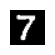

cell:  tensor(7)


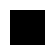

cell:  tensor(0)


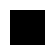

cell:  tensor(0)


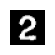

cell:  tensor(2)


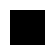

cell:  tensor(0)


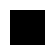

cell:  tensor(0)


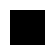

cell:  tensor(0)


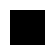

cell:  tensor(0)


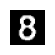

cell:  tensor(8)


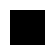

cell:  tensor(0)


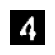

cell:  tensor(9)


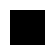

cell:  tensor(0)


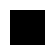

cell:  tensor(0)


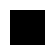

cell:  tensor(0)


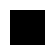

cell:  tensor(0)


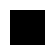

cell:  tensor(0)


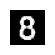

cell:  tensor(8)


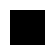

cell:  tensor(0)


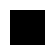

cell:  tensor(0)


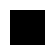

cell:  tensor(0)


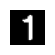

cell:  tensor(1)


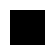

cell:  tensor(0)


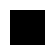

cell:  tensor(0)


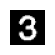

cell:  tensor(3)


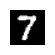

cell:  tensor(7)


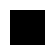

cell:  tensor(0)


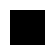

cell:  tensor(0)


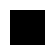

cell:  tensor(0)


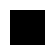

cell:  tensor(0)


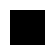

cell:  tensor(0)


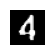

cell:  tensor(4)


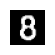

cell:  tensor(8)


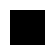

cell:  tensor(0)


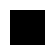

cell:  tensor(0)


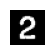

cell:  tensor(2)


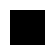

cell:  tensor(0)


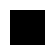

cell:  tensor(0)


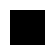

cell:  tensor(0)


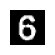

cell:  tensor(6)


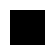

cell:  tensor(0)


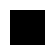

cell:  tensor(0)


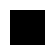

cell:  tensor(0)


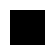

cell:  tensor(0)


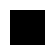

cell:  tensor(0)


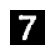

cell:  tensor(7)


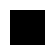

cell:  tensor(0)


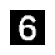

cell:  tensor(6)


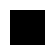

cell:  tensor(0)


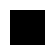

cell:  tensor(0)


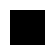

cell:  tensor(0)


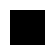

cell:  tensor(0)


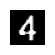

cell:  tensor(4)


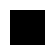

cell:  tensor(0)


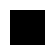

cell:  tensor(0)


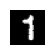

cell:  tensor(1)


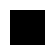

cell:  tensor(0)


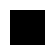

cell:  tensor(0)


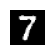

cell:  tensor(7)


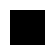

cell:  tensor(0)


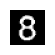

cell:  tensor(8)


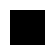

cell:  tensor(0)


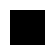

cell:  tensor(0)


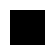

cell:  tensor(0)


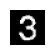

cell:  tensor(3)


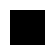

cell:  tensor(0)


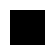

cell:  tensor(0)


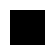

cell:  tensor(0)


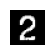

cell:  tensor(2)


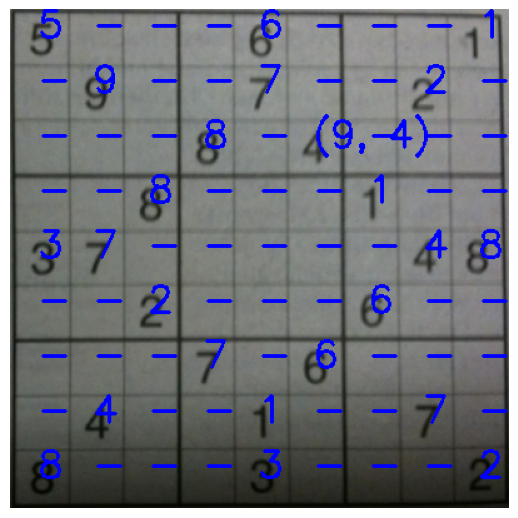

grid (9, 9)
solution: 
finish solving (9, 9) [[5 8 3 2 6 4 7 9 1]
 [6 9 4 1 7 3 8 2 5]
 [7 2 1 8 5 9 4 6 3]
 [9 5 8 6 4 2 1 3 7]
 [3 7 6 5 9 1 2 4 8]
 [4 1 2 3 8 7 6 5 9]
 [1 3 9 7 2 6 5 8 4]
 [2 4 5 9 1 8 3 7 6]
 [8 6 7 4 3 5 9 1 2]]
finish solving (9, 9) [[5 8 4 2 6 3 7 9 1]
 [6 9 3 1 7 4 8 2 5]
 [7 2 1 8 5 9 4 6 3]
 [9 5 8 6 4 2 1 3 7]
 [3 7 6 5 9 1 2 4 8]
 [4 1 2 3 8 7 6 5 9]
 [1 3 9 7 2 6 5 8 4]
 [2 4 5 9 1 8 3 7 6]
 [8 6 7 4 3 5 9 1 2]]
finish solving (9, 9) [[5 8 4 2 6 3 7 9 1]
 [6 9 3 4 7 1 8 2 5]
 [7 2 1 8 5 9 4 6 3]
 [9 5 8 6 4 2 1 3 7]
 [3 7 6 1 9 5 2 4 8]
 [4 1 2 3 8 7 6 5 9]
 [1 3 5 7 2 6 9 8 4]
 [2 4 9 5 1 8 3 7 6]
 [8 6 7 9 3 4 5 1 2]]
finish solving (9, 9) [[5 8 4 2 6 3 7 9 1]
 [6 9 3 4 7 1 8 2 5]
 [7 2 1 8 5 9 4 6 3]
 [9 5 8 6 4 2 1 3 7]
 [3 7 6 1 9 5 2 4 8]
 [4 1 2 3 8 7 6 5 9]
 [1 3 9 7 2 6 5 8 4]
 [2 4 5 9 1 8 3 7 6]
 [8 6 7 5 3 4 9 1 2]]


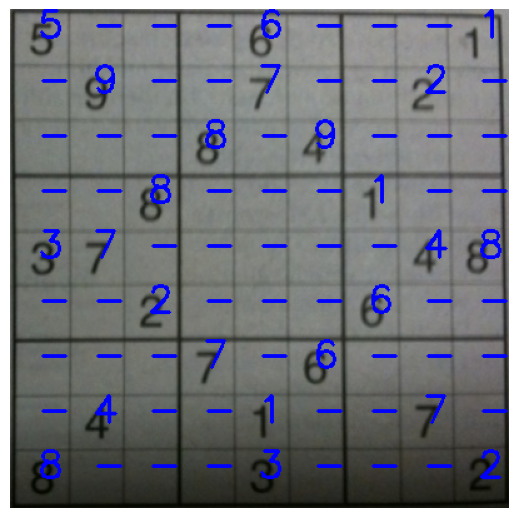

HERE IT IS: 


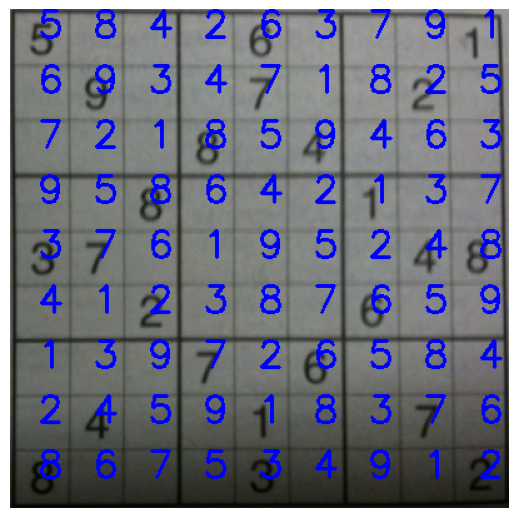

grid (9, 9)
solution: 
finish solving (9, 9) [[5 8 4 2 6 3 7 9 1]
 [6 9 3 5 7 1 8 2 4]
 [7 2 1 8 9 4 5 6 3]
 [9 5 8 6 4 2 1 3 7]
 [3 7 6 1 5 9 2 4 8]
 [4 1 2 3 8 7 6 5 9]
 [1 3 9 7 2 6 4 8 5]
 [2 4 5 9 1 8 3 7 6]
 [8 6 7 4 3 5 9 1 2]]


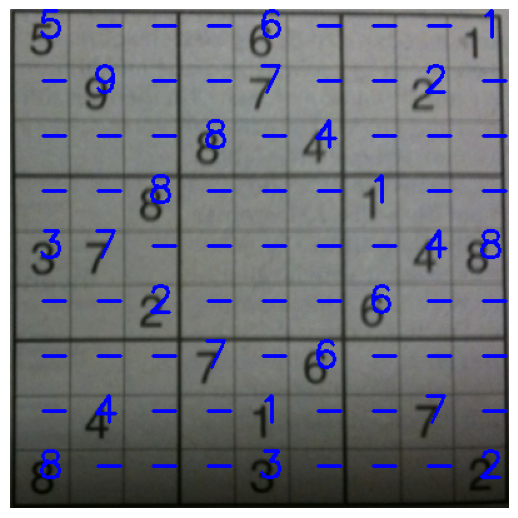

HERE IT IS: 


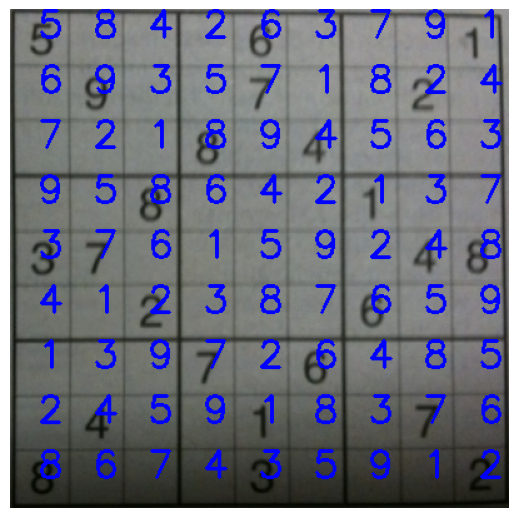

In [83]:
TESTING = False
img = cv2.imread('v2_train/image201.jpg')
#img = cv2.imread('testimg.jpg')
#img = cv2.imread('testyt.jpg')
heightImg = img.shape[0]
widthImg = img.shape[1]
avgDim = (heightImg + widthImg) / 2
imgBlank = np.zeros((heightImg, widthImg, 3), np.uint8)
#img = cv2.imread('testimg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
# div = np.float32(gray)/(close)
# res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))

if avgDim < 500:
    kernel_size = 11
elif avgDim < 1000:
    kernel_size = 13
elif avgDim < 1500:
    kernel_size = 15
else:
    kernel_size = 15
blur = cv2.GaussianBlur(gray, (kernel_size,kernel_size), 0)
#median = cv2.medianBlur(gray,3)
#blur = cv2.bilateralFilter(gray,9,75,75)


thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, kernel_size,2)

#_, otsuThresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

notthresh = cv2.bitwise_not(thresh)

#kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], np.uint8)
kernel = np.ones((3,3), np.uint8)
#kernel = np.array([[0,0,1,0,0],[0,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]], np.uint8)
notthreshCopy = notthresh.copy()
dilated2 = cv2.dilate(notthreshCopy, kernel, iterations=1)
opening = cv2.morphologyEx(notthresh, cv2.MORPH_OPEN, kernel)
dilated = cv2.dilate(opening, kernel, iterations=1)

#flooded = cv2.floodFill(dilated, None, (0,0), 128)

imgContours = img.copy() 
imgBigContour = img.copy()
imgBigContourApprox = img.copy()
imgJustBigContour = np.zeros((heightImg, widthImg, 1), np.uint8)
contours, hierarchy = cv2.findContours(dilated2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgContours = cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 3)

contoursSorted = sorted(contours, key=cv2.contourArea, reverse=True)
largestContour = contoursSorted[0]
imgBigContour = cv2.drawContours(imgBigContour, [largestContour], -1, (0, 255, 0), 3)
imgJustBigContour = cv2.drawContours(imgJustBigContour, [largestContour], -1, 255, 3)

#epsilon = 0.001*cv2.arcLength(largestContour,True)
#approx = cv2.approxPolyDP(largestContour,epsilon,True)

#x,y,w,h = cv2.boundingRect(largestContour)
#imgBigContourApprox = cv2.rectangle(imgBigContourApprox,(x,y),(x+w,y+h),(0,255,0),2)

kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
grid = cv2.dilate(imgJustBigContour, kernel, iterations=2)
grid = cv2.erode(grid, kernel, iterations=3)

lines = cv2.HoughLines(grid, 1, np.pi / 180, 200)

gridcopy = grid.copy()
height, width = np.shape(grid)
if lines is not None:
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        cv2.line(gridcopy, pt1, pt2, 255)

#imgBigContourApprox = cv2.drawContours(imgBigContourApprox, [approx], -1, (0, 255, 0), 3)
# if len(approx) == 4:
#     print("good")
# else:
#     print("Cannot find grid")

for current in lines:
    if current[0][0] == 0.0 and current[0][1] == -100.0:
        continue
    p1 = current[0][0]
    theta1 = current[0][1]
    pt1current = [None, None]
    pt2current = [None, None]
    #If the line is almost horizontal
    if theta1 > np.pi * 45 / 180 and theta1 < np.pi * 135 / 180:
        pt1current[0] = 0
        pt1current[1] = p1 / np.sin(theta1)
        pt2current[0] = width
        pt2current[1] = -pt2current[0] / np.tan(theta1) + p1 / np.sin(theta1)
    #If the line is almost vertical
    else:
        pt1current[1] = 0
        pt1current[0] = p1 / np.cos(theta1)
        pt2current[1] = height
        pt2current[0] = -pt2current[1] * np.tan(theta1) + p1 / np.cos(theta1)
    #Now to fuse lines
    for pos in lines:
        #if pos[0].all() == current[0].all():
        if (pos[0] == current[0]).all():
            continue
        #print("pos - curr",pos[0][0], current[0][0], "=", abs(pos[0][0] - current[0][0]), abs(pos[0][0] - current[0][0])<20000,  "   angle", pos[0][1], current[0][1], "= ", abs(pos[0][1] - current[0][1]), abs(pos[0][1] - current[0][1]) < np.pi * 170/180)
        if abs(pos[0][0] - current[0][0]) < 20 and abs(pos[0][1] - current[0][1]) < np.pi * 10 / 180:
            p = pos[0][0]
            theta = pos[0][1]
            
            pt1 = [None, None]
            pt2 = [None, None]
            # If the line is almost horizontal
            if theta > np.pi * 45 / 180 and theta < np.pi * 135 / 180:
                pt1[0] = 0
                pt1[1] = p / np.sin(theta)
                pt2[0] = width
                pt2[1] = -pt2[0] / np.tan(theta) + p / np.sin(theta)
            # If the line is almost vertical
            else:
                pt1[1] = 0
                pt1[0] = p / np.cos(theta)
                pt2[1] = height
                pt2[0] = -pt2[1] * np.tan(theta) + p / np.cos(theta)
            #If the endpoints are close to each other, merge the lines
            if (pt1[0] - pt1current[0])**2 + (pt1[1] - pt1current[1])**2 < 64**2 and (pt2[0] - pt2current[0])**2 + (pt2[1] - pt2current[1])**2 < 64**2:
                current[0][0] = (current[0][0] + pos[0][0]) / 2
                current[0][1] = (current[0][1] + pos[0][1]) / 2
                pos[0][0] = 0
                pos[0][1] = -100
                

#print("finish lines", lines)
filteredLines = np.ndarray((0, 1, 2), np.float32)
for current in lines:
    if (current[0][0] is None and current[0][1] is None) or (np.isnan(current[0][0]) and np.isnan(current[0][1])) or (current[0][0] == 0.0 and current[0][1] == -100.0):
        #print("continue")
        continue
    else:
        #print("append", current)
        filteredLines = np.append(current, filteredLines)

#print("filteredLines", np.shape(filteredLines), len(filteredLines))
filteredLines = np.reshape(filteredLines, (len(filteredLines)//2, 1, 2))
gridcopyMerged = gray.copy()

height, width = np.shape(grid)
if filteredLines is not None:
    for i in range(len(filteredLines)):
        rho = filteredLines[i][0][0]
        theta = filteredLines[i][0][1]
        #print(rho, theta)
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        cv2.line(gridcopyMerged, pt1, pt2, 255, thickness=1)


topedge = [[np.inf, np.inf]]
bottomedge = [[-np.inf, -np.inf]]
leftedge = [[np.inf, np.inf]]
leftxintercept = np.inf
rightedge = [[-np.inf, -np.inf]]
rightxintercept = 0
for i in range(len(filteredLines)):
    current = filteredLines[i][0]
    p = current[0]
    theta = current[1]
    xIntercept = p * np.cos(theta)

    #If the line is nearly vertical
    if theta > np.pi * 45 / 180 and theta < np.pi * 135 / 180:
        if p < topedge[0][0]:
            topedge[0] = current[:]
        if p > bottomedge[0][0]:
            bottomedge[0] = current[:]

    #If the line is nearly horizontal
    else:
        if xIntercept > rightxintercept:
            rightedge[0] = current[:]
            rightxintercept = xIntercept
        if xIntercept <= leftxintercept:
            leftedge[0] = current[:]
            leftxintercept = xIntercept
            
# display_image_in_actual_size(imgBigContour)
# display_image_in_actual_size(imgBigContourApprox)
# display_image_in_actual_size(imgJustBigContour)
# display_image_in_actual_size(grid)
# display_image_in_actual_size(gridcopy)
# display_image_in_actual_size(gridcopyMerged)

def drawLineff(line, img, color=255):
    rho = line[0][0]
    theta = line[0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 10000*(-b)), int(y0 + 10000*(a)))
    pt2 = (int(x0 - 10000*(-b)), int(y0 - 10000*(a)))
    cv2.line(img, pt1, pt2, color=color, thickness=1)
    return img

def drawLine(line, img, color=255):
    height, width, *_ = np.shape(img)
    if line[0][1] != 0:
        m = -1 / np.tan(line[0][1])
        c = line[0][0] / np.sin(line[0][1])
        cv2.line(img, (0, int(c)), (width, int(m * width + c)), color)
    else:
        cv2.line(img, (line[0][0]*height, 0), (line[0][0]*height, height), color)
    return img

fourLines = img.copy()
fourLines = drawLineff(topedge, fourLines, (255, 0, 0))
fourLines = drawLineff(bottomedge, fourLines, (0, 255, 0))
fourLines = drawLineff(leftedge, fourLines, (0, 0, 255))
fourLines = drawLineff(rightedge, fourLines, (255, 0, 255))

def intersection(line1, line2, img):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    height, width, *_ = np.shape(img)
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    
    if (x0 < 0):
        x0 = max(0, y0 - int(np.round(rho1 / np.sin(theta1))))
    elif (x0 > width):
        x0 = min(width, y0 + int(np.round(rho1 / np.sin(theta1))))
    if (y0 < 0):
        y0 = max(0, x0 - int(np.round(rho1 / np.cos(theta1))))
    elif (y0 > height):
        y0 = min(height, x0 + int(np.round(rho1 / np.cos(theta1))))
    return [[x0, y0]]


ul = intersection(topedge, leftedge, img)
ur = intersection(topedge, rightedge, img)
bl = intersection(bottomedge, leftedge, img)
br = intersection(bottomedge, rightedge, img)

dots = img.copy()
dots = cv2.circle(dots, (ul[0][0], ul[0][1]), 5, (0,255,0), -1)
dots = cv2.circle(dots, (ur[0][0], ur[0][1]), 5, (0,255,0), -1)
dots = cv2.circle(dots, (bl[0][0], bl[0][1]), 5, (0,255,0), -1)
dots = cv2.circle(dots, (br[0][0], br[0][1]), 5, (0,255,0), -1)


box = np.array([ul, ur, bl, br], dtype=np.float32)

#distance between the points
widthBottom = np.sqrt(((br[0][0] - bl[0][0]) ** 2) + ((br[0][1] - bl[0][1]) ** 2))
widthTop = np.sqrt(((ur[0][0] - ul[0][0]) ** 2) + ((ur[0][1] - ul[0][1]) ** 2))
heightLeft = np.sqrt(((ul[0][0] - bl[0][0]) ** 2) + ((ul[0][1] - bl[0][1]) ** 2))
heightRight = np.sqrt(((ur[0][0] - br[0][0]) ** 2) + ((ur[0][1] - br[0][1]) ** 2))

minEdge = min(int(widthBottom), int(widthTop), int(heightLeft), int(heightRight))



imageBox = np.array([[0, 0],[minEdge, 0], [0, minEdge],[minEdge, minEdge]], dtype=np.float32)

warpMatrix = cv2.getPerspectiveTransform(box, imageBox)
warpedImgColored = cv2.warpPerspective(img, warpMatrix, (minEdge, minEdge))
#warpedImgBW = cv2.warpPerspective(dilated, warpMatrix, (widthImg, heightImg))
warpedImgBW = cv2.cvtColor(warpedImgColored, cv2.COLOR_BGR2GRAY)

warpDim = warpedImgBW.shape[0]
print("warpdim", warpDim)
if warpDim < 400:
    kernel_size = 9
    adaptive = 7
elif warpDim < 500:
    kernel_size = 9
    adaptive = 7
elif warpDim < 1000:
    kernel_size = 11
    adaptive = 11
elif warpDim < 1500:
    kernel_size = 13
    adaptive = 13
else:
    kernel_size = 13
    adaptive = 13

warpedImgBW = cv2.GaussianBlur(warpedImgBW, (kernel_size, kernel_size), 0)
warpedImgBW = cv2.adaptiveThreshold(warpedImgBW, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, adaptive, 2)
warpedImgBW = cv2.bitwise_not(warpedImgBW)
kernel = np.ones((3,3), np.uint8)
#kernel = np.array([[0,1,0],[1,1,1], [0,1,0]], np.uint8)
#warpedImgBW = cv2.erode(warpedImgBW, kernel, iterations=1)
#warpedImgBW = cv2.dilate(warpedImgBW, kernel, iterations=1)

#cells = [np.hsplit(row, 9) for row in np.vsplit(warpedImgBW, 9)]

imgheight=int(warpedImgBW.shape[0])
imgwidth=int(warpedImgBW.shape[1])

y1 = 0
M = imgheight//9
N = imgwidth//9

i = 1
cells = []
for y in range(0,imgheight,M):
    for x in range(0, imgwidth, N):
        if x + (N) > imgwidth:
            #x1 = imgwidth
            x1 = x + N
            tiles = warpedImgBW[y:y1,x:x1]
            break
        else:
            x1 = x + N
        if y + (M) > imgheight:
            #y1 = imgheight
            y1 = y + M
            tiles = warpedImgBW[y:y1,x:x1] 
            break
        else:
            y1 = y + M
        tiles = warpedImgBW[y:y1,x:x1]
        cells.append(tiles)
        #display_image_in_actual_size(tiles)
cellsInit = np.array(cells)
cells = cellsInit.reshape(9,9, M,N)
cells_reshaped = cellsInit.reshape(81, 1, M,N)
cells_resized = np.zeros(shape=(81, 1, 28,28))


for j, row in enumerate(cells):
    for i, cell in enumerate(row):
        #print(j*9+i)
        kernel = np.ones((3,3), np.uint8)
        # kernel = np.array([[1,0,1],[0,0,0], [1,0,1]], np.uint8)
        #row[i] = cv2.erode(cell, kernel, iterations=1)
        #kernel = np.array([[0,1,0],[1,1,1], [0,1,0]], np.uint8)
        #row[i] = cv2.dilate(cell, kernel, iterations=1)
        #row[i] = cv2.erode(cell, kernel, iterations=2)
        cellHeight = cell.shape[0]
        cellWidth = cell.shape[1]
        if j*9+i == 0 or TESTING:
            display_image_in_actual_size(row[i])
        for y in range(M):
            _,row[i],_,_ = cv2.floodFill(row[i], None, (y,0), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (0,y), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (cellHeight-1,y), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (y,cellWidth-1), 0)
            
        if j*9+i == 0 or TESTING:
            display_image_in_actual_size(row[i])
        #np.set_printoptions(threshold=sys.maxsize)
        if imgheight < 500:
            threshold = 255*3
        elif imgheight < 1000:
            threshold = 255*4
        elif imgheight < 1500:
            threshold = 255*4
        else:
            threshold = 255*4
        rowtop = None
        rowbottom = None
        colleft = None
        colright = None
        thresholdBottom = threshold
        thresholdTop = threshold
        thresholdLeft = threshold
        thresholdRight = threshold
        tryThresh = 5
        rows = cellHeight
        center = rows // 2
        for k in range(center, rows):
            if rowbottom is None or rowbottom < center+tryThresh:
                temp = row[i][k]
                if sum(temp) < thresholdBottom or k == rows-1:
                    rowbottom = k
            if rowtop is None or rowtop > center-tryThresh:
                temp = row[i][rows-k-1]
                if sum(temp) < thresholdTop or k == rows-1:
                    rowtop = rows-k-1
            if colright is None or colright < center+tryThresh:
                temp = row[i][:, k]
                if sum(temp) < thresholdRight or k == rows-1:
                    colright = k
            if colleft is None or colleft > center-tryThresh:
                temp = row[i][:, rows-k-1]
                if sum(temp) < thresholdLeft or k == rows-1:
                    colleft = rows-k-1
        # Centering the bounding box's contents
        newimg = np.zeros(np.shape(row[i]), dtype=np.uint8)
        startatX = (rows + colleft - colright)//2
        startatY = (rows - rowbottom + rowtop)//2
        
        finishatX = (rows - colleft + colright)//2
        finishatY = (rows + rowbottom - rowtop)//2
        #print number (tight bounding box)
        if finishatX > startatX and finishatY > startatY:
            number = row[i][rowtop:rowbottom, colleft:colright]
            #print("numner")
            if j*9+i == 0 or TESTING:
                display_image_in_actual_size(number)
        
        #centering
        for yy in range(startatY, (rows + rowbottom - rowtop)//2):
            for x in range(startatX, (rows - colleft + colright)//2):
                tempval = row[i][rowtop + yy - startatY][ colleft + x - startatX]
                newimg[yy][x] = tempval
        row[i] = newimg.copy()
        
        if j*9+i == 0 or TESTING:
            display_image_in_actual_size(newimg)
        #resize and zoom in the number
        if finishatX > startatX and finishatY > startatY and (finishatX - startatX) * (finishatY - startatY) > row[i].shape[0]**2 // 25:
            edge = max(finishatX - startatX, finishatY - startatY)
            if finishatX - startatX > finishatY - startatY:
                #print("first")
                number = row[i][max(0, (rows//2)-(edge//2)-5):min((rows//2)+(edge//2)+5, M), max(0, startatX-5):min(startatX+edge+5, M)]
            else:
                #print("second", startatY, edge//2)
                number = row[i][max(0, startatY-5):min(startatY+edge+5, M), max(0, (rows//2)-(edge//2)-5):min((rows//2)+(edge//2)+5, M)]
            #print("numnber shape", number.shape)
            #display_image_in_actual_size(number)
            cells_resized[j*9 + i][0] = cv2.resize(number, (28,28))
            if j*9+i == 0 or TESTING:
                display_image_in_actual_size(cells_resized[j*9 + i][0])

#cells_reshaped = cells.reshape(81, 1, M,N)





device = torch.device("cpu")
print(device)

df_train = pd.read_csv('./training/train.csv')
df_test = pd.read_csv('./training/test.csv')
print('Train size: ', df_train.shape)
print('Test size: ', df_test.shape)
#df_train.head()

# onesWithMark = [3846,4369,6220,6306,6500,7526,9140,10078,11406,12172,12614,13103,13134,13477,13483,13552,13674,13852,13914,14416,14715,17976,18767,18943,19134,19777,19808,20605,22551,22627,22769,23534,23852,24373,27686,28582,31748,34709,35668,36998,37641,38701,39755,39835,41106,41360]
# for ones in onesWithMark:
#     display_image_in_actual_size(df_train.iloc[ones, 1:].values.reshape((28,28)))
#     print(ones)
    
# sys.exit()
if not os.path.isfile('./results/model.pth'):
    onesWithMark = [3846,4369,6220,6306,6500,7526,9140,10078,11406,12172,12614,13103,13134,13477,13483,13552,13674,13852,13914,14416,14715,17976,18767,18943,19134,19777,19808,20605,22551,22627,22769,23534,23852,24373,27686,28582,31748,34709,35668,36998,37641,38701,39755,39835,41106,41360]

    for i, row in df_train.iterrows():
        if row['label'] == 1 and i not in onesWithMark:
            if np.random.random() < 0.9:
                randOneIdx = random.choice(onesWithMark)
                randOneImg = df_train.iloc[randOneIdx].values[1:].copy()
                randOneImg = randOneImg.reshape((28,28))#.astype(np.uint8)
                #print("before", randOneImg)
                #display_image_in_actual_size(randOneImg)
                randOneImg = transforms.Compose(
                        [
                        #transforms.ToPILImage(),
    #                     transforms.RandomRotation(30),
                        transforms.ToTensor(),
                        transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1))
                        #transforms.ToTensor()
                        ])(randOneImg).ravel()
                df_train.iloc[i, 1:] = randOneImg.tolist()
                #print("after", df_train.iloc[i].values)
                #display_image_in_actual_size(randOneImg.reshape((28,28)))
    
    averageNumber = np.zeros((28,28))
    count = 0
    for i, row in df_train.iterrows():
        if row['label'] == 1:
            averageNumber += row.values[1:].reshape((28,28))
            count += 1
    averageNumber /= count
    display_image_in_actual_size(averageNumber)
    
averageNumber = np.zeros((28,28))
count = 0
for i, row in df_train.iterrows():
    if row['label'] == 1:
        averageNumber += row.values[1:].reshape((28,28))
        count += 1
averageNumber /= count
display_image_in_actual_size(averageNumber)

averageNumber = np.zeros((28,28))
count = 0
for i, row in df_train.iterrows():
    if row['label'] == 7:
        averageNumber += row.values[1:].reshape((28,28))
        count += 1
averageNumber /= count
display_image_in_actual_size(averageNumber)

train_data = df_train.drop('label', axis=1).values
# train_data.shape
# print(train_data.max())
if not os.path.isfile('./results/mean_std.csv'):
    
    train_mean = train_data.mean()/255.
    train_std = train_data.std()/255.
    df = pd.DataFrame([train_mean, train_std])
    df.to_csv('./results/mean_std.csv', index=False, header=False)
    print("saved mean and std to file...")
else:
    print('Loading mean and std from file...')
    df = pd.read_csv('./results/mean_std.csv', header=None)
    train_mean = df.iloc[0,0]
    train_std = df.iloc[1,0]

# train_std
print('Mean: ', train_mean)
print('Std: ', train_std)

# Train-Val split
mask = np.random.rand(len(df_train)) < 0.8
df_val = df_train[~mask]
df_train = df_train[mask]
print('Train size: ', df_train.shape)
print('Val size: ', df_val.shape)
print('Test size: ', df_test.shape)
#df_train.head()

ind = np.random.randint(0, df_train.shape[0]-1)
plt.imshow(df_train.iloc[ind].values[1:].reshape((28,28)), cmap='gray')
plt.title(str(df_train.iloc[ind][0]))

# Create dataset class for PyTorch
class MNISTDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, n):
        data = self.df.iloc[n]
        image = data[1:].values.reshape((28,28)).astype(np.uint8)
        label = data[0]
        if self.transform:
            image = self.transform(image)
        return (image, label)
    
# Initialize transformation, datasets, and loaders
batch_size = 16
classes = range(10)
train_transform = transforms.Compose(
                    [
                    transforms.ToPILImage(),
#                     transforms.RandomRotation(30),
                    transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1)),
                    transforms.ColorJitter(brightness=0.2, contrast=0.2),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[train_mean], std=[train_std]),
                    ])
# don't (really) need the data augmentation in validation
val_transform = transforms.Compose(
                    [
                    transforms.ToPILImage(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[train_mean], std=[train_std]),
                    ])
test_transform = val_transform

train_dataset = MNISTDataset(df_train, transform = train_transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                batch_size=batch_size,shuffle = True)
val_dataset = MNISTDataset(df_val, transform = val_transform)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                batch_size=batch_size,shuffle = False)

# sanity check for training data
imgs, lbls = next(iter(train_loader))
imgs[0].data.shape
print("sanity img data shape", imgs[0].data.shape)
print("sanity img lbls", lbls)
print("Training data sanity check")
print(imgs.data.min())
print(imgs.data.max())
print(imgs.data.mean())
print(imgs.data.std())
print(classes[lbls[0]])
plt.imshow(imgs[0].data.reshape((28,28)), cmap="gray")

# sanity check for validation data
# imgs, lbls = next(iter(val_loader))
# imgs[0].data.shape
# print("Validation data sanity check")
# print(imgs.data.min())
# print(imgs.data.max())
# print(imgs.data.mean())
# print(imgs.data.std())
# print(classes[lbls[0]])
# plt.imshow(imgs[0].data.reshape((28,28)), cmap="gray")

## deeper model adapted from https://www.kaggle.com/gustafsilva/cnn-digit-recognizer-pytorch
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(128, 10)
        )
                
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = F.log_softmax(x, dim=1)
        return x

# initialize CNN, cost, and optimizer
model = Model()
model.to(device)
criterion = nn.NLLLoss()   # with log_softmax() as the last layer, this is equivalent to cross entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

 #extract images containing 1
df_train_1 = df_train[df_train['label']==1]

df_train_1_idx_map = {}

for i in range(len(df_train)):
    if df_train.iloc[i,0] == 1:
        df_train_1_idx_map[hash(tuple(df_train.iloc[i,1:].values))] = i


# save indexes of images containing 1 in the original training set

#print histogram of every pixel
plt.clf()
print(df_train_1.iloc[:,1:].values)
#compute histogram of every pixel
hist = np.array([])
for img in df_train_1.iloc[:,1:].values:
    if sum(img) > 0:
        #print(sum(img))
        hist = np.append(hist, sum(img))

plt.hist(hist, bins=100)
plt.show()
# sys.exit()
n_clusters = 16
#apply k-means clustering to extract 2 clusters in pytorch
#kmeans = KMeans(n_clusters=n_clusters, random_state=111, n_init=1).fit(df_train_1.iloc[:,1:])
#kmeans2 = KMeans(n_clusters=2, random_state=0, n_init=20).fit(df_train_1.iloc[:,1:].values[kmeans.labels_==0])

# print("Kmeans")
# print(kmeans.labels_)
# print("first")
# first = df_train_1.iloc[:,1:].values[kmeans.labels_==0]
#print first class

# for i in [549,622,975,1221,1755,1783,1908,2023,2190,2284,2313,2362,2493,2597,2767,3624,3845,3846,4369,4509,4716,4789,5146,5427,5676,6220,6306,6327,6358,6479,6500,6682,6861,7149,7216,7242,7376,7389,7405,7526,8631,9140,10040,10042,10078,10114,11406,11811,12140,12172,12256,12257,12487,12504,12614,12690,12815,13093,13103,13105,13134,13226,13414,13477,13483,13552,13622,13674,13852,13872,13914,14140,14238,14416,14715,15085,15788,15793,15814,15901,16116,16329,17976,18419,18756,18767,18943,19015,19134,19453,19608,19633,19763,19777,19808,19889,19979,19991,20137,20605,21125,21427,21545,21826,21867,22469,22516,22551,22627,22769,23534,23538,23610,23694,23852,24350,24372,24373,24845,24910,25168,25361,25856,25863,26223,26409,26992,27122,27337,27462,27547,27686,27975,28554,28582,28660,28718,28842,28981,29178,29475,30086,30198,30872,30989,31097,31166,31620,31748,31956,34172,34454,34709,35164,35585,35668,36521,36617,36715,36726,36998,37034,37641,37868,38543,38701,38757,39318,39372,39755,39835,40624,40759,40897,41106,41303,41333,41360,41535,41882]:
#     display_image_in_actual_size(df_train.iloc[i,1:].values.reshape(28,28))
#     print(i)

#sys.exit( )
# for i in range(n_clusters):
#     print("cluster", i, "----------------------------------")
#     clust = df_train_1.iloc[:,1:].values[kmeans.labels_==i]
#     print("clust len", len(clust))
#     for c in clust:
#         print(df_train_1_idx_map[hash(tuple(c))])

# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==0].reshape(-1,28,28)))
# print("second----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==1].reshape(-1,28,28)))
# # print("first1")
# # for i in range(100):
# #     display_image_in_actual_size(random.choice(first[kmeans2.labels_==0].reshape(-1,28,28)))
# # print("first2")
# # for i in range(100):
# #     display_image_in_actual_size(random.choice(first[kmeans2.labels_==1].reshape(-1,28,28)))
# print("third----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==2].reshape(-1,28,28)))
# print("fourth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==3].reshape(-1,28,28)))
# print("fifth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==4].reshape(-1,28,28)))
# print("sixth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==5].reshape(-1,28,28)))
# print("seventh----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==6].reshape(-1,28,28)))
# print("eighth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==7].reshape(-1,28,28)))
# print("ninth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==8].reshape(-1,28,28)))
# print("tenth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==9].reshape(-1,28,28)))
# print("eleventh----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==10].reshape(-1,28,28)))
# print("twelfth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==11].reshape(-1,28,28)))
# print("tirteenth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==12].reshape(-1,28,28)))
# print("fourteenth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==13].reshape(-1,28,28)))
# print("fifteenth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==14].reshape(-1,28,28)))
# print("sixteenth----------------------------------------------------------------------------")
# for i in range(30):
#     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==15].reshape(-1,28,28)))
# # for i in range(30):
# #     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==16].reshape(-1,28,28)))
# # for i in range(30):
# #     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==17].reshape(-1,28,28)))
# # for i in range(30):
# #     display_image_in_actual_size(random.choice(df_train_1.iloc[:,1:].values[kmeans.labels_==18].reshape(-1,28,28)))




if os.path.isfile('./results/model.pth'):
    model.load_state_dict(torch.load('./results/model.pth'))
    optimizer.load_state_dict(torch.load('./results/optimizer.pth'))
else:
    # Some initialization work first...
    epochs = 100
    train_losses, val_losses = [], []
    train_accu, val_accu = [], []
    start_time = time.time()
    early_stop_counter = 10   # stop when the validation loss does not improve for 10 iterations to prevent overfitting
    counter = 0
    best_val_loss = float('Inf')
    
   

    for e in range(epochs):
        epoch_start_time = time.time()
        running_loss = 0
        accuracy=0
        print("Epoch: {}/{}".format(e+1, epochs))
        # training step
        model.train()
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            log_ps = model(images)
            
            ps = torch.exp(log_ps)                
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
            
            loss = criterion(log_ps, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        # record training loss and error, then evaluate using validation data
        train_losses.append(running_loss/len(train_loader))
        train_accu.append(accuracy/len(train_loader))
        val_loss = 0
        accuracy=0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                log_ps = model(images)
                val_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        val_losses.append(val_loss/len(val_loader))
        val_accu.append(accuracy/len(val_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
            "Time: {:.2f}s..".format(time.time()-epoch_start_time),
            "Training Loss: {:.3f}.. ".format(train_losses[-1]),
            "Training Accu: {:.3f}.. ".format(train_accu[-1]),
            "Val Loss: {:.3f}.. ".format(val_losses[-1]),
            "Val Accu: {:.3f}".format(val_accu[-1]))

    #     print('Epoch %d / %d took %6.2f seconds' % (e+1, epochs, time.time()-epoch_start_time))
    #     print('Total training time till this epoch was %8.2f seconds' % (time.time()-start_time))
        
        if val_losses[-1] + 0.005 < best_val_loss:
            best_val_loss = val_losses[-1]
            counter=0
            best_model_wts = copy.deepcopy(model.state_dict())
        else:
            counter+=1
            print('Validation loss has not improved since: {:.3f}..'.format(best_val_loss), 'Count: ', str(counter))
            if counter >= early_stop_counter:
                print('Early Stopping Now!!!!')
                model.load_state_dict(best_model_wts)
                break
            
    torch.save(model.state_dict(), './results/model.pth')
    torch.save(optimizer.state_dict(), './results/optimizer.pth')
        
    # plot training history
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    ax = plt.gca()
    ax.set_xlim([0, e + 2])
    plt.ylabel('Loss')
    plt.plot(range(1, e + 2), train_losses[:e+1], 'r', label='Training Loss')
    plt.plot(range(1, e + 2), val_losses[:e+1], 'b', label='Validation Loss')
    ax.grid(linestyle='-.')
    plt.legend()
    plt.subplot(2,1,2)
    ax = plt.gca()
    ax.set_xlim([0, e+2])
    plt.ylabel('Accuracy')
    plt.plot(range(1, e + 2), train_accu[:e+1], 'r', label='Training Accuracy')
    plt.plot(range(1, e + 2), val_accu[:e+1], 'b', label='Validation Accuracy')
    ax.grid(linestyle='-.')
    plt.legend()
    plt.show()


# prepare to predict test data - REMEMBER PRE-PROCESSING!
# I originally forgot to scale and normalize, which caused problems....

# some sanity check to make sure
# x_test = df_test.values
# x_test = x_test.reshape([-1, 28, 28]).astype(np.float32)
# x_test = x_test/255.
# x_test = (x_test-train_mean)/train_std
# print(x_test.min())
# print(x_test.max())
# print(x_test.mean())
# print(x_test.std())

# # x_test = df_test.values
# # x_test = x_test.reshape([-1, 28, 28]).astype(np.float)
# # x_test = x_test/255.
# # x_test = (x_test-train_mean)/train_std
# x_test = np.expand_dims(x_test, axis=1)
# x_test = torch.from_numpy(x_test).float().to(device)
# # x_test.shape
# print("X_TEST", x_test.type(), x_test.shape)

# # prediction time!
# model.eval()   # this is needed to disable dropouts
# with torch.no_grad():    # turn off gradient computation because we don't need it for prediction
#     ps = model(x_test)
#     prediction = torch.argmax(ps, 1)
#     print('Prediction',prediction)


display_image_in_actual_size(gray)
#display_image_in_actual_size(res)
display_image_in_actual_size(blur)
display_image_in_actual_size(thresh)
#display_image_in_actual_size(otsuThresh)
display_image_in_actual_size(notthresh)
display_image_in_actual_size(dilated2)
display_image_in_actual_size(opening)
display_image_in_actual_size(dilated)
display_image_in_actual_size(imgContours)
display_image_in_actual_size(imgBigContour)
display_image_in_actual_size(imgBigContourApprox)
display_image_in_actual_size(imgJustBigContour)
display_image_in_actual_size(grid)
display_image_in_actual_size(gridcopy)
display_image_in_actual_size(gridcopyMerged)
display_image_in_actual_size(fourLines)
display_image_in_actual_size(dots)
display_image_in_actual_size(warpedImgColored)
display_image_in_actual_size(warpedImgBW)

# cells_resized = np.array([])
# for j, row in enumerate(cells_reshaped):
#     for i, cell in enumerate(row):
#         resized = cv2.resize(cells_reshaped[j][i], (28,28))
#         cells_resized = np.append(cells_resized, resized)
#         #display_image_in_actual_size(cells_reshaped[j][i])
#         #display_image_in_actual_size(resized)
# cells_resized = cells_resized.reshape(81, 1,28,28)
hist = np.array([])
for cell in cells_resized:
    if np.sum(cell) > 0:
        hist = np.append(hist, np.sum(cell)/cell.shape[0]**2) 

plt.hist(hist, bins=100)
plt.show()

cells_resized_std = cells_resized.astype(np.double)
cells_resized_std = cells_resized_std/255.
cells_resized_std = (cells_resized_std-train_mean)/train_std
cells_resized_std = torch.from_numpy(cells_resized_std).float() #torch.tensor(cells_resized, dtype=torch.float32)
#print("RESIZED SHAPE: ", cells_resized_std.shape, cells_resized_std.dtype, cells_resized_std)
        
#print("CELLS SHAPE: ", cells_resized_std.shape)
# prediction time!
model.eval()   # this is needed to disable dropouts
with torch.no_grad():    # turn off gradient computation because we don't need it for prediction
    output = model(cells_resized_std)
    prediction = torch.argmax(output, 1).to("cpu")
    confidence = torch.max(output, 1)
    #print("confidence", confidence)
    predVal, predictionK = torch.topk(output, 2, 1)
    #print('Prediction',prediction.type(), prediction)
    print('PredictionK',predictionK.type(), predictionK, predVal)
#print("full pred ", output.data.max(1, keepdim=True))
for i, cell in enumerate(cells_resized):
    #print("cell ", cell, "shape", cell.shape, "sum", np.sum(cell), "sum[0]", np.sum(cell[0]), np.sum(cells_resized[i][0]))
    if np.sum(cell[0])/(255*cell[0].shape[0]**2) < 0.05:
        prediction[i] = 0
        #print("manuale zero", np.sum(cell[0])/(255*cell[0].shape[0]**2), np.sum(cells_resized[i][0])/(255*cell[0].shape[0]**2), 255*cell[0].shape[0]**2,)
    # else:
    #     print("cell ", i, " has ", np.sum(cell[0])/(255*cell.shape[0]**2), " percent filled,", sum(cell[0]), " sum pixels", cell[0].shape[0]**2, " total pixels", 255*cell[0].shape[0]**2, " total pixels * 255")
    display_image_in_actual_size(cells_resized[i][0])
    print("cell: ", prediction[i])
    


allCombs = np.array([])

def compute_combinations(matrix, row, col):
    global allCombs
    mat = matrix.copy()
    if row == matrix.shape[0]:
        # Base case: end of the matrix, print the matrix
        #print("done", matrix)
        allCombs = np.append(allCombs, np.array(mat))
        return
    #print("row", row, "col", col, "matrix", matrix[row, col], "shape", matrix.shape[0], matrix.shape[1])
    # Recursive case: set the current cell to the first value and recurse
    if type(matrix[row, col]) is tuple:
        mat[row, col] = matrix[row, col][0]
        compute_combinations(mat, row + (col + 1) // matrix.shape[1], (col + 1) % matrix.shape[1])

        # Recursive case: set the current cell to the second value and recurse
        mat[row, col] = matrix[row, col][1]
        compute_combinations(mat, row + (col + 1) // matrix.shape[1], (col + 1) % matrix.shape[1])
    else:
        compute_combinations(mat, row + (col + 1) // matrix.shape[1], (col + 1) % matrix.shape[1])

prediction = prediction.numpy().tolist()
#print("PREDVAL", predVal[0].shape, predVal)
for i, pair in enumerate(predVal):
    # get value from a tensor of shape (1,2)
    a = pair[0].item()
    b = pair[1].item()
    exp_a = np.floor(np.log10(abs(a)))
    exp_b = np.floor(np.log10(abs(b)))
    if prediction[i] != 0 and abs(exp_a - exp_b) < 1:
        prediction[i] = (predictionK[i][0].item(), predictionK[i][1].item())


predictGrid = np.array(prediction.copy(), dtype=object).reshape(9,9)
#print(predictGrid)
#print(type(predictGrid[0,2]), predictGrid[0,2])
compute_combinations(predictGrid, 0, 0)
allCombs = allCombs.reshape(-1, 9, 9)
#print("allCombs", allCombs)


warpedImgColoredEmpty = warpedImgColored.copy()
warpedImgColoredSolved = warpedImgColored.copy()
for j in range(9):
    for i in range(9):
        val = str(predictGrid[j][i])
        if predictGrid[j][i] == 0:
            val = "-"
        cv2.putText(warpedImgColoredEmpty, val, (i*M+int(M/2), j*N+int(N/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
display_image_in_actual_size(warpedImgColoredEmpty)


#sys.exit()
for combgrid in allCombs:

    grid = combgrid.copy()
    print("grid", grid.shape)
    def possible (y,x,n):
        global grid
        for i in range (0,9) : 
            if grid[y][i] == n :
                return False
        for i in range (0,9) :
            if grid[i][x] == n :
                return False
        x0 = (x//3)*3
        y0 = (y//3)*3
        for i in range (0,3) :
            for j in range (0,3) :
                if grid[y0+i][x0+j] == n :
                    return False
        return True

    def solve():
        global grid
        global solution
        for y in range (9) :
            for x in range (9) :
                if grid[y][x] == 0 :
                    for n in range (1,10) :
                        if possible(y,x,n) :
                            grid[y][x] = n
                            solve()
                            grid[y][x] = 0
                    return
        print("finish solving", grid.shape, grid)
        solution = grid.copy()
        if not possib:
            return


    # SANITY CHECK OF THE EXTRACTION
    possib = False
    for j in range(9):
        for i in range(9):
            if grid[j][i] != 0:
                possib = possible(j, i, grid[j][i])
                if not possib:
                    #print("Extraction failed, there are some errors")
                    break

    solution = None




    print("solution: ")
    #check if array is all zeros (empty)


    if np.any(grid):
        solve()

        if solution is not None:

            warpedImgColoredEmpty = warpedImgColored.copy()
            warpedImgColoredSolved = warpedImgColored.copy()
            for j in range(9):
                for i in range(9):
                    val = str(grid[j][i])
                    if grid[j][i] == 0:
                        val = "-"
                    cv2.putText(warpedImgColoredEmpty, val, (i*M+int(M/2), j*N+int(N/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    
            display_image_in_actual_size(warpedImgColoredEmpty)

            print("HERE IT IS: ")
            for j in range(9):
                for i in range(9):
                    val = str(solution[j][i])
                    cv2.putText(warpedImgColoredSolved, val, (i*M+int(M/2), j*N+int(N/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    
            display_image_in_actual_size(warpedImgColoredSolved)
        else:
            print("SORRY, NO SOLUTION FOUND")
    else:
        print("GRID IS EMPTY")



#split image in 9x9 tiles
# tiles = [warpedImgBW[y:y+M,x:x+N] for y in range(0,imgheight,M) for x in range(0, imgwidth, N)]
# for tile in tiles:
#     display_image_in_actual_size(tile)

#display_image_in_actual_size(gray2)
#f, axarr = plt.subplots(4,1)
#axarr[0].imshow(gray, 800, cmap='gray')
#axarr[1].imshow(blur, cmap='gray')
#axarr[2].imshow(thresh, cmap='gray')
#axarr[3].imshow(otsuThresh, cmap='gray')
#for ax in axarr:
#    ax.axis('off')
#plt.xticks([]),plt.yticks([])